In [3]:
# Imports:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Reading data from csv file:
dataset = pd.read_csv('/content/drive/MyDrive/Bazy danych/Lab6/0_DOLNOSLĄSKIE.csv')

dataset

,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,6,Beko,33.0,bd.,1.0
1,1,7,Electrolux,28.0,bd.,3.5
2,2,3,Beko,30.0,bd.,2.5
3,3,6,Electrolux,40.0,bd.,3.5
4,4,4,Dyson,44.0,bd.,2.0
...,...,...,...,...,...,...
595,595,14,Electrolux,31.0,M,2.0
596,596,4,Tefal,NaN,bd.,3.5
597,597,8,Electrolux,39.0,bd.,1.0
598,598,5,Electrolux,47.0,K,2.5


## **Cleaning the dataframe**

**Deleting the unnamed column:**

In [24]:
for col in dataset.columns:
    print(col)

Unnamed: 0
Dni od zakupu
Marka
Wiek kupującego
Płeć kupującego
Ocena


In [25]:
data = dataset.copy()  #Original data

no_unnamed = data.drop(['Unnamed: 0'], axis = 1)  #Changing all issues separately
dataset = dataset.drop(['Unnamed: 0'], axis = 1)  #Changing all issues in one dataframe

In [26]:
for col in dataset.columns:
    print(col)

Dni od zakupu
Marka
Wiek kupującego
Płeć kupującego
Ocena


**Deleting rows with no client age provided:**

In [27]:
with_age = data[dataset["Wiek kupującego"] > 0]
dataset = dataset[dataset["Wiek kupującego"] > 0]

**Deleting rows with no client gender provided:**

In [29]:
with_gender = data[data["Płeć kupującego"] != 'bd.']
dataset = dataset[dataset["Płeć kupującego"] != 'bd.']

**Separating a list of all brand names:**

In [31]:
brands_list = pd.DataFrame({'Marka':sorted(dataset['Marka'].unique().tolist())})

In [32]:
brands_list

,Marka
0,Beko
1,Dyson
2,Electrolux
3,Samsung
4,Tefal


### **Data after cleaning:**

In [33]:
dataset  #all cleaning in one dataframe

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
11,6,Electrolux,37.0,K,1.0
13,7,Tefal,51.0,M,1.5
18,11,Electrolux,34.0,M,3.0
23,7,Dyson,33.0,M,2.5
26,5,Beko,36.0,M,3.0
...,...,...,...,...,...
590,6,Tefal,50.0,M,4.5
592,11,Samsung,45.0,K,2.0
593,7,Electrolux,40.0,K,3.0
595,14,Electrolux,31.0,M,2.0


### **Saving cleaned data into separate csv files:**

In [34]:
dir = "/content/drive/MyDrive/Bazy danych/Lab6/"

no_unnamed.to_csv(dir + "Dolnośląskie_dane")
with_age.to_csv(dir + "Dane_wiek")
with_gender.to_csv(dir + "Dane_płeć")
brands_list.to_csv(dir + "Marki_unikatowe")
dataset.to_csv(dir + "Dolnośląskie_tidy_data") # Csv file with all cleaning done

# **Data analysis**

### **Product evaluation**

**Avarage product evaluation:**

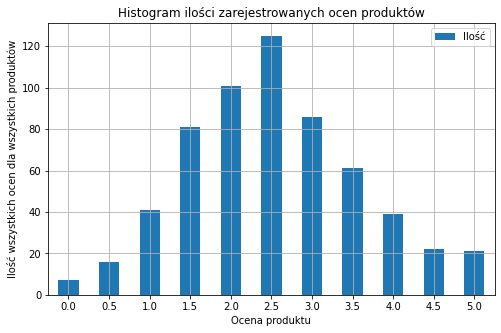

In [40]:
product_eval = pd.DataFrame({'Ocena':sorted(data['Ocena'].unique().tolist()), 'Ilość':data.groupby(['Ocena']).size().tolist()})

product_eval.plot.bar(x='Ocena', y='Ilość', figsize=(8,5))

plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.xlabel('Ocena produktu')
plt.ylabel('Ilość wszystkich ocen dla wszystkich produktów')
plt.title('Histogram ilości zarejestrowanych ocen produktów')


plt.savefig(dir + "Plots/" + "ocena_produktu")

**Product evaluation for each brand:**

In [42]:
data['Marka'].unique()

array(['Beko', 'Electrolux', 'Dyson', 'Tefal', 'Samsung'], dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


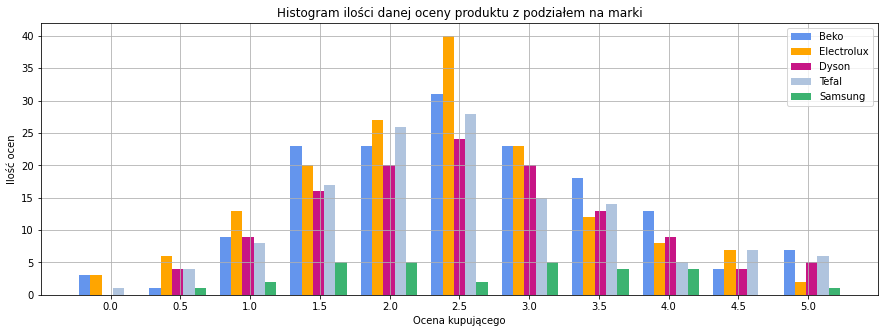

In [59]:
# Creating a separate evaluation list for each brand:

def get_brand_evaluation(data, brand_name):

    eval_list = data[data['Marka'] == brand_name]['Ocena']
    return eval_list

Beko_ev = get_brand_evaluation(data, "Beko")
Electrolux_ev = get_brand_evaluation(data, "Electrolux")
Dyson_ev = get_brand_evaluation(data, "Dyson")
Tefal_ev = get_brand_evaluation(data, "Tefal")
Samsung_ev = get_brand_evaluation(data, "Samsung")


colors = ['cornflowerblue', 'orange', 'mediumvioletred', 'lightsteelblue', 'mediumseagreen']

comp_names = ['Beko', 'Electrolux', 'Dyson', 'Tefal', 'Samsung']

arr = np.linspace(0, 5, 11)

# Make the histogram using a list of lists:
plt.figure(figsize=(15,5))
plt.hist([Beko_ev, Electrolux_ev, Dyson_ev, Tefal_ev, Samsung_ev], bins = 11, color = colors, label = comp_names)   


plt.legend()
plt.grid(True)
plt.xticks(np.arange(0,4.4, step=0.5))
plt.xticks(np.linspace(0.25, 4.75, 11), arr, rotation=0)
plt.xlabel('Ocena kupującego')
plt.ylabel('Ilość ocen')
plt.title('Histogram ilości danej oceny produktu z podziałem na marki')

plt.savefig(dir + "Plots/" + "ocena_produktu_podział_marka")

### **Sales**

**Number of sales made for each brand:**

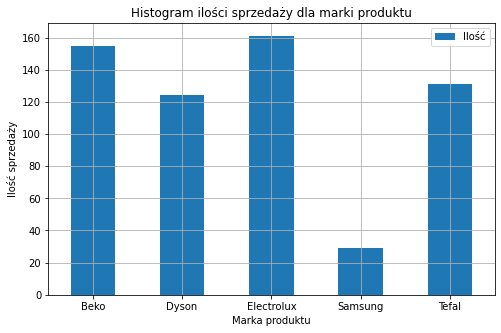

In [61]:
brand_sales = pd.DataFrame({'Marka':sorted(data['Marka'].unique().tolist()), 'Ilość':data.groupby(['Marka']).size().tolist()})

brand_sales.plot.bar(x = 'Marka', y = 'Ilość', figsize = (8,5))

plt.legend()
plt.grid(True)
plt.xticks(rotation = 0)
plt.xlabel('Marka produktu')
plt.ylabel('Ilość sprzedaży')
plt.title('Histogram ilości sprzedaży dla marki produktu')

plt.savefig(dir + "Plots/" + "sprzedaż_podział_marka")

### **Clients demographic**

**Client age and sales:**

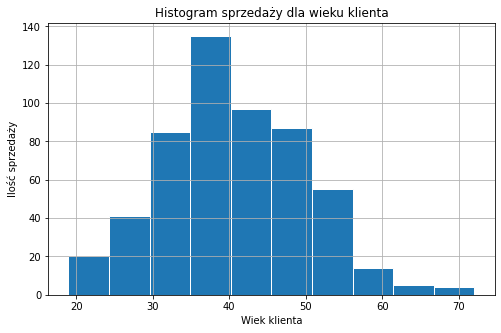

In [67]:
Marki_wiek = pd.DataFrame({'Wiek kupującego':with_age['Wiek kupującego'], 'Marka':with_age['Marka']})

plt.figure(figsize = (8,5))
fig = plt.hist(with_age["Wiek kupującego"], edgecolor = 'white', bins = 10)     #bins=10 devides ages into 10 groups of interest


plt.grid(True)
plt.xlabel('Wiek klienta')
plt.ylabel('Ilość sprzedaży')
plt.title('Histogram sprzedaży dla wieku klienta')

#save to file
plt.savefig(dir + "Plots/" + "sprzedaż_wiek")

**Client age and brands:**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


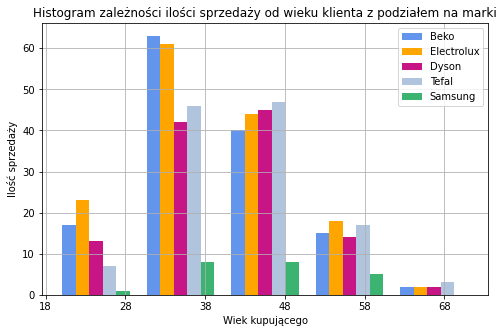

In [69]:
# Creating a separate evaluation list for each brand:

def get_brand4age(data, brand_name):

    eval_list = with_age[with_age['Marka'] == brand_name]['Wiek kupującego']
    return eval_list

Beko_age = get_brand4age(data, "Beko")
Electrolux_age = get_brand4age(data, "Electrolux")
Dyson_age = get_brand4age(data, "Dyson")
Tefal_age = get_brand4age(data, "Tefal")
Samsung_age = get_brand4age(data, "Samsung")


colors = ['cornflowerblue', 'orange', 'mediumvioletred', 'lightsteelblue', 'mediumseagreen']
comp_names = ['Beko', 'Electrolux', 'Dyson', 'Tefal', 'Samsung']


plt.figure(figsize = (8, 5))
plt.hist([Beko_age, Electrolux_age, Dyson_age, Tefal_age, Samsung_age], bins = 5, color = colors, label = comp_names)   

plt.legend()
plt.grid(True)
plt.xticks(np.linspace(18,68,6))
plt.xlabel('Wiek kupującego')
plt.ylabel('Ilość sprzedaży')
plt.title('Histogram zależności ilości sprzedaży od wieku klienta z podziałem na marki')

plt.savefig(dir + "Plots/" + "wiek_podział_marka")

### **Gender analysis**

**Gender and the number of transactions:**

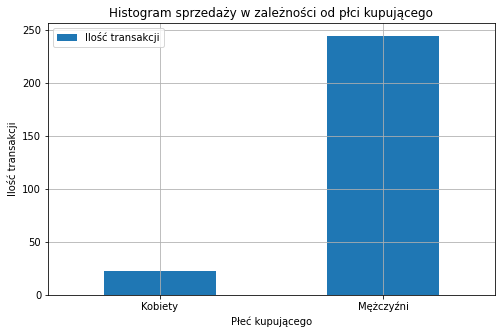

In [74]:
def gender_sales(with_gender):

    female = (with_gender[(with_gender[['Płeć kupującego']] == 'K').all(axis = 1)])['Płeć kupującego']
    male = (with_gender[(with_gender[['Płeć kupującego']] == 'M').all(axis = 1)])['Płeć kupującego']
    return female, male

female, male = gender_sales(with_gender)

trans_gender = pd.DataFrame({'Płeć kupującego':['Kobiety', 'Mężczyźni'], 'Ilość transakcji':[female.size, male.size]})
fig = trans_gender.plot.bar(x='Płeć kupującego', y='Ilość transakcji', rot = 0, figsize=(8,5))

plt.grid(True)
plt.xlabel('Płeć kupującego')
plt.ylabel('Ilość transakcji')
plt.title('Histogram sprzedaży w zależności od płci kupującego')

plt.savefig(dir + "Plots/" + "płeć_sprzedaż")

**Genders and brand sales:**

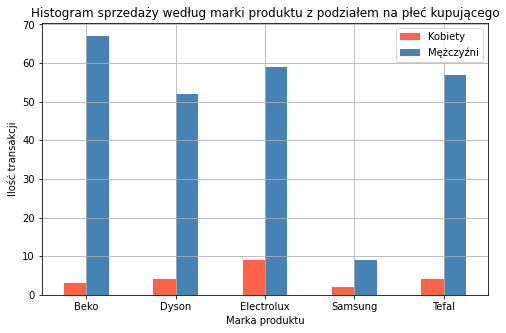

In [88]:
def gender_brand_sales(with_gender):

    female = with_gender[with_gender['Płeć kupującego'] == 'K']
    male = with_gender[with_gender['Płeć kupującego'] == 'M']

    gender_data = pd.DataFrame({'Marka':sorted(female['Marka'].unique().tolist()),
                                'Kobiety':female.groupby(['Marka']).size().tolist(),
                                'Mężczyźni':male.groupby(['Marka']).size().tolist()})
    return gender_data

all_data = gender_brand_sales(with_gender)


colors = ['tomato', 'steelblue']      
all_data.plot.bar(x='Marka', y={'Kobiety','Mężczyźni'}, figsize=(8, 5), color = colors)

plt.legend()
plt.grid(True)
plt.xticks(np.arange(0.4,4.4, step=0.8))
plt.xticks([0, 1, 2, 3, 4], list(all_data['Marka']), rotation = 0)
plt.xlabel('Marka produktu')
plt.ylabel('Ilość transakcji')
plt.title('Histogram sprzedaży według marki produktu z podziałem na płeć kupującego')


plt.savefig(dir + "Plots/" + "płeć_sprzedaż_firmy")

**Females and the brand sales:**

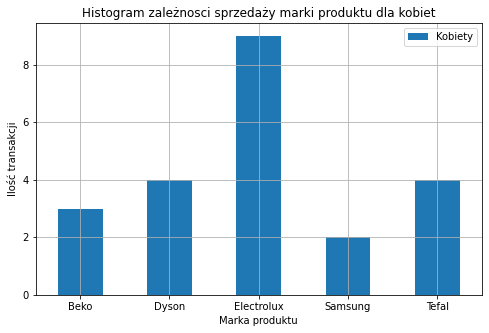

In [80]:
# Make the histogram using a list of lists
all_data.plot.bar(x = 'Marka', y = 'Kobiety', figsize = (8, 5))

plt.legend()
plt.grid(True)
plt.xticks(rotation = 0)
plt.xlabel('Marka produktu')
plt.ylabel('Ilość transakcji')
plt.title('Histogram zależnosci sprzedaży marki produktu dla kobiet')

plt.savefig(dir + "Plots/" + "kobiety_sprzedaż_firmy")

**Males and the brand sales:**

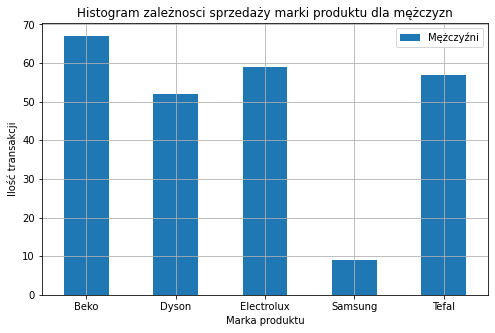

In [81]:
all_data.plot.bar(x = 'Marka', y = 'Mężczyźni', figsize = (8, 5))

plt.legend()
plt.grid(True)
plt.xticks(rotation = 0)
plt.xlabel('Marka produktu')
plt.ylabel('Ilość transakcji')
plt.title('Histogram zależnosci sprzedaży marki produktu dla mężczyzn')

plt.savefig(dir + "Plots/" + "mężczyźni_sprzedaż_firmy")

### **Shopping dates**

**Analysing the time period since the shopping:**

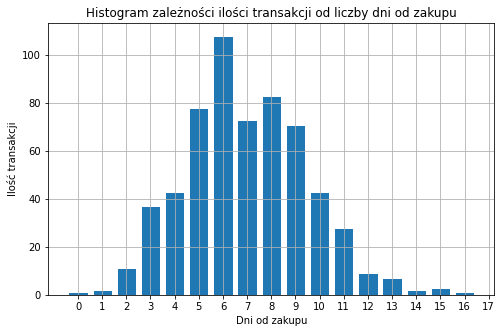

In [79]:
days_since_shopping = pd.DataFrame({'Dni od zakupu':sorted(data['Dni od zakupu'].unique().tolist()),
                                  'Ilość':data.groupby(['Dni od zakupu']).size().tolist()})

plt.figure(figsize = (8, 5))
plt.bar(days_since_shopping['Dni od zakupu'], days_since_shopping['Ilość'], edgecolor = 'white')

plt.grid(True)
plt.xticks(np.arange(0, 18, step = 1))
plt.xlabel('Dni od zakupu')
plt.ylabel('Ilość transakcji')
plt.title('Histogram zależności ilości transakcji od liczby dni od zakupu')

plt.savefig(dir + "Plots/" + "sprzedaż_dzień")